# Apartment sales and their influencing factors

This project is to explore the market values of real estate properties in Russia and their influencing factors. 

The data is retrieved from a real estate agency, which is an archive of sale ads for realty in St. Petersburg, Russia and the neigboring areas collected over the past few years. This project is the foundation for an automated system that is capable of detecting anomalies and fraudulent activities. 

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is inputted automatically based upon the map data, for example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
from plotly import tools
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

In [2]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data_us.csv', delimiter='\t')
print(df.head())
df.info()
df.describe().T

           date_posted  days_listed  last_price  bedrooms  kitchen_area  \
0  2019-03-07T00:00:00          NaN    260000.0         3          25.0   
1  2018-12-04T00:00:00         81.0     67000.0         1          11.0   
2  2015-08-20T00:00:00        558.0    103920.0         2           8.3   
3  2015-07-24T00:00:00        424.0   1298000.0         3           NaN   
4  2018-06-19T00:00:00        121.0    200000.0         2          41.0   

   living_area  total_area  balconies  ceiling_height  floors_total  floor  \
0         51.0       108.0        NaN            2.70          16.0      8   
1         18.6        40.4        2.0             NaN          11.0      1   
2         34.3        56.0        0.0             NaN           5.0      4   
3          NaN       159.0        0.0             NaN          14.0      9   
4         32.0       100.0        NaN            3.03          14.0     13   

   total_images bike_parking  is_studio  is_open_plan     locality_name  \
0    

,count,mean,std,min,25%,50%,75%,max
days_listed,20518.0,180.888634,219.727988,1.0,45.00,95.00,232.0,1580.0
last_price,23699.0,130830.975611,217740.265684,244.0,68000.00,93000.00,136000.0,15260000.0
bedrooms,23699.0,2.070636,1.078405,0.0,1.00,2.00,3.0,19.0
kitchen_area,21421.0,10.569807,5.905438,1.3,7.00,9.10,12.0,112.0
living_area,21796.0,34.457852,22.030445,2.0,18.60,30.00,42.3,409.7
total_area,23699.0,60.348651,35.654083,12.0,40.00,52.00,69.9,900.0
balconies,12180.0,1.150082,1.071300,0.0,0.00,1.00,2.0,5.0
ceiling_height,14504.0,2.771499,1.261056,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,10.673824,6.597173,1.0,5.00,9.00,16.0,60.0
floor,23699.0,5.892358,4.885249,1.0,2.00,4.00,8.0,33.0


In [3]:
table_cat = ff.create_table(df.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

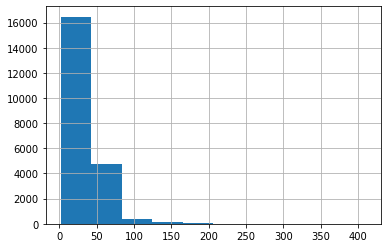

In [4]:
#Check the normality of distribution of the target variables
df['living_area'].hist()

### Conclusion

There are 23,699 observations (rows) and 22 variables (columns) in this dataset. Data types include integer, float, boolean and string. Each row in the table represents each listed house for sale, i.e. house ad, with its corresponding characteristics. 

Variables:

Non-missing-value variables:
- date_posted (object): need to change type to date
- last_price (float)
- bedrooms (int)
- floor (int)
- total_images (int)
- is_studio (boolean)
- is_open_plan (boolean)
- total_area (float)

Missing-value variables:
- balconies (float): need to change type to integer because this is the number of balconies, shouldn't be a decimal
- ceiling_height (float): approximate normal distribution
- pond_dist (float): normal distribution
- park_dist (float): non-normal distribution
- bike_parking (object): need to change type to boolean, beacause this is true or false value
- airport_dist (float): non-normal
- city_center_dist (float): non-normal distribution
- ponds_within_3000 (float): need to change type to integer because this is the number of ponds, shouldn't be a decimal
- parks_within_3000 (float): need to change type to integer because this is the number of parks, shouldn't be a decimal
- days_listed (float): non-normal distribution 
- kitchen_area (float): non-normal distribution 
- living_area (float): non-normal distribution 
- floors_total (float): need to change type to integer because this is the number of floors, shouldn't be a decimal
- locality_name (object)

### Step 2. Data preprocessing

### Check duplicated rows

In [5]:
#Lower case to make sure there is not duplicate
df['locality_name']=df['locality_name'].str.lower()
df['locality_name'].unique()
df[df.duplicated(keep = False)]

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000


### Changing data type

In [6]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%dT%H:%M:%S')
print(df['date_posted'].dtypes)


datetime64[ns]


In [7]:
#Retrieve removal date to see if there is a same removal day to impute missing values for days_listed
df['date_removed'] = df['date_posted'] + pd.to_timedelta(df['days_listed'], unit='d')

df.head(10)
#No similar removal date, so the ad was removed by user, not automatically removed by the system

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed
0,2019-03-07,NaN,260000.0,3,25.00,51.00,108.00,NaN,2.70,16.0,8,20,NaN,False,False,saint petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0,NaT
1,2018-12-04,81.0,67000.0,1,11.00,18.60,40.40,2.0,NaN,11.0,1,7,NaN,False,False,shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0,2019-02-23
2,2015-08-20,558.0,103920.0,2,8.30,34.30,56.00,0.0,NaN,5.0,4,10,NaN,False,False,saint petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0,2017-02-28
3,2015-07-24,424.0,1298000.0,3,NaN,NaN,159.00,0.0,NaN,14.0,9,0,NaN,False,False,saint petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0,2016-09-20
4,2018-06-19,121.0,200000.0,2,41.00,32.00,100.00,NaN,3.03,14.0,13,2,NaN,False,False,saint petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0,2018-10-18
5,2018-09-10,55.0,57800.0,1,9.10,14.40,30.40,NaN,NaN,12.0,5,10,NaN,False,False,yanino-1 village,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-04
6,2017-11-02,155.0,74000.0,1,14.40,10.60,37.30,1.0,NaN,26.0,6,6,NaN,False,False,pargolovo village,52996.0,19143.0,NaN,0.0,NaN,0.0,2018-04-06
7,2019-04-18,NaN,158300.0,2,18.90,NaN,71.60,2.0,NaN,24.0,22,5,NaN,False,False,saint petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0,NaT
8,2018-05-23,189.0,58000.0,1,8.81,15.43,33.16,NaN,NaN,27.0,26,20,NaN,False,False,murino village,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-28
9,2017-02-26,289.0,108000.0,3,6.50,43.60,61.00,2.0,2.50,9.0,7,18,NaN,False,False,saint petersburg,50898.0,15008.0,NaN,0.0,NaN,0.0,2017-12-12


In [8]:
#Change to boolean type
df['bike_parking'] = df['bike_parking'].astype('bool') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
date_posted          23699 non-null datetime64[ns]
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         23699 non-null bool
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            

### Processing missing values

In [9]:
df.isnull().mean().sort_values()

date_posted          0.000000
is_open_plan         0.000000
is_studio            0.000000
bike_parking         0.000000
floor                0.000000
total_area           0.000000
total_images         0.000000
bedrooms             0.000000
last_price           0.000000
locality_name        0.002068
floors_total         0.003629
living_area          0.080299
kitchen_area         0.096122
days_listed          0.134225
date_removed         0.134225
ponds_within_3000    0.232837
parks_within_3000    0.232837
city_center_dist     0.232879
airport_dist         0.233850
ceiling_height       0.387991
balconies            0.486054
pond_dist            0.615596
park_dist            0.659100
dtype: float64

#### Strategies to deal with missing values

Drop observations of columns that have <5% missing values: 
- locality_name
- floors_total

Impute missing values with 0:
- balconies (int): because the value range is narrow: 50%tile is 1, it's highly likely that if the user doesn’t enter the number of balconies, then there probably aren’t any.

Impute missing values based on other variables: because these are pairwise variables: 
- ponds_within_3000 (int)
- parks_within_3000 (int)
- pond_dist (float)
- park_dist (float)

Impute missing values using mean or median depdent on their distribution (normal distribution: mean, non-normal: median) and the sub-group that they belong to:
- ceiling_height (float)
- balconies (int)
- air_port_dist (float)
- city_center_dist (float)
- kitchen_area (float):
- living_area (float):

Leave the missing value as it is:
- bike_parking (object)
- days_listed

In [10]:
#Drop observations of columns that have <5% missing values: locality_name & floors_total
df.dropna(subset = ['locality_name','floors_total'], inplace = True)
df.info()
#The dataset now is left with 23,565 (drop 134 observations)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
date_posted          23565 non-null datetime64[ns]
days_listed          20394 non-null float64
last_price           23565 non-null float64
bedrooms             23565 non-null int64
kitchen_area         21343 non-null float64
living_area          21700 non-null float64
total_area           23565 non-null float64
balconies            12090 non-null float64
ceiling_height       14481 non-null float64
floors_total         23565 non-null float64
floor                23565 non-null int64
total_images         23565 non-null int64
bike_parking         23565 non-null bool
is_studio            23565 non-null bool
is_open_plan         23565 non-null bool
locality_name        23565 non-null object
airport_dist         18041 non-null float64
city_center_dist     18064 non-null float64
park_dist            8030 non-null float64
parks_within_3000    18065 non-null float64
pond_dist            

In [11]:
#Impute missing values with 0: balconies
df['balconies'] = df['balconies'].fillna(0)
df.isnull().mean().sort_values()

date_posted          0.000000
locality_name        0.000000
is_open_plan         0.000000
is_studio            0.000000
bike_parking         0.000000
floor                0.000000
floors_total         0.000000
total_images         0.000000
total_area           0.000000
bedrooms             0.000000
last_price           0.000000
balconies            0.000000
living_area          0.079143
kitchen_area         0.094292
days_listed          0.134564
date_removed         0.134564
ponds_within_3000    0.233397
parks_within_3000    0.233397
city_center_dist     0.233439
airport_dist         0.234415
ceiling_height       0.385487
pond_dist            0.616550
park_dist            0.659240
dtype: float64

Missing-value variables:

- balconies (float): need to change type to integer because this is the number of balconies, shouldn't be a decimal
- ceiling_height (float): approximate normal distribution
- pond_dist (float): normal distribution
- park_dist (float): non-normal distribution
- bike_parking (object): need to change type to boolean, beacause this is true or false value
- airport_dist (float): non-normal
- city_center_dist (float): non-normal distribution
- ponds_within_3000 (float): need to change type to integer because this is the number of ponds, shouldn't be a decimal
- parks_within_3000 (float): need to change type to integer because this is the number of parks, shouldn't be a decimal
- days_listed (float): non-normal distribution
- kitchen_area (float): non-normal distribution
- living_area (float): non-normal distribution
- floors_total (float): need to change type to integer because this is the number of floors, shouldn't be a decimal
- locality_name (object)

In [12]:
#Impute missing values using mean or median depdent on their distribution (normal distribution: mean, non-normal: median) 
#and the sub-group that they belong to
df['locality_name'].value_counts() #326 locality names
df['bedrooms'].value_counts() #1-15 rooms
    
#Group 'last_price' to 'last_price_level': divide 'last_price' into 5 quantiles
df['last_price_level'] = pd.qcut(df['last_price'], q=5, labels=False)

#Group 'total_area' to 'total_area_level': divide 'total_area' into 5 quantiles
df['total_area_level'] = pd.qcut(df['total_area'], q=5,labels=False)

df.head(20)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level
0,2019-03-07,NaN,260000.0,3,25.00,51.00,108.00,0.0,2.70,16.0,8,20,True,False,False,saint petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0,NaT,4,4
1,2018-12-04,81.0,67000.0,1,11.00,18.60,40.40,2.0,NaN,11.0,1,7,True,False,False,shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0,2019-02-23,1,1
2,2015-08-20,558.0,103920.0,2,8.30,34.30,56.00,0.0,NaN,5.0,4,10,True,False,False,saint petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0,2017-02-28,2,2
3,2015-07-24,424.0,1298000.0,3,NaN,NaN,159.00,0.0,NaN,14.0,9,0,True,False,False,saint petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0,2016-09-20,4,4
4,2018-06-19,121.0,200000.0,2,41.00,32.00,100.00,0.0,3.03,14.0,13,2,True,False,False,saint petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0,2018-10-18,4,4
5,2018-09-10,55.0,57800.0,1,9.10,14.40,30.40,0.0,NaN,12.0,5,10,True,False,False,yanino-1 village,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-04,0,0
6,2017-11-02,155.0,74000.0,1,14.40,10.60,37.30,1.0,NaN,26.0,6,6,True,False,False,pargolovo village,52996.0,19143.0,NaN,0.0,NaN,0.0,2018-04-06,1,0
7,2019-04-18,NaN,158300.0,2,18.90,NaN,71.60,2.0,NaN,24.0,22,5,True,False,False,saint petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0,NaT,4,3
8,2018-05-23,189.0,58000.0,1,8.81,15.43,33.16,0.0,NaN,27.0,26,20,True,False,False,murino village,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-28,0,0
9,2017-02-26,289.0,108000.0,3,6.50,43.60,61.00,2.0,2.50,9.0,7,18,True,False,False,saint petersburg,50898.0,15008.0,NaN,0.0,NaN,0.0,2017-12-12,3,3


In [13]:
df[df['living_area'] >= df['total_area']]
#There are two houses that have 'living_area' = 'total_area'
df[df['kitchen_area'] >= df['total_area']]
#There are no houses that have 'kitchen_area' = 'total_area'

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level


In [14]:
#Variables relating to the house itself, might choose group_by "total_area_level"
df['living_area'] = df['living_area'].fillna(df.groupby('total_area_level')['living_area'].transform('median'))
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('total_area_level')['kitchen_area'].transform('median'))
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('total_area_level')['ceiling_height'].transform('mean'))

df.isnull().mean().sort_values()

date_posted          0.000000
locality_name        0.000000
is_open_plan         0.000000
is_studio            0.000000
last_price_level     0.000000
total_images         0.000000
floor                0.000000
floors_total         0.000000
bike_parking         0.000000
balconies            0.000000
total_area           0.000000
living_area          0.000000
kitchen_area         0.000000
bedrooms             0.000000
last_price           0.000000
ceiling_height       0.000000
total_area_level     0.000000
days_listed          0.134564
date_removed         0.134564
parks_within_3000    0.233397
ponds_within_3000    0.233397
city_center_dist     0.233439
airport_dist         0.234415
pond_dist            0.616550
park_dist            0.659240
dtype: float64

In [15]:
#Check if there is any living/kitchen area >= total_area
#living_area
df[df['living_area'] > df['total_area']]

#Fix the rows that have living_area > total area 
#by replacing the current living_area with the difference between total_area and kitchen_area
df['living_area'] = df['living_area'].where(df['living_area'] <= df['total_area'], df['total_area'] - df['kitchen_area'])

df[df['living_area'] > df['total_area']] #No observations - Done

#kitchen_area
df[df['kitchen_area'] > df['total_area']] #No observations - No need to do anything

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level


In [16]:
#Investigate the nature of missing values from pond_dist column
#Does it depend on "ponds_within_3000": hypothesis: pond_dist will be NaN if ponds_within_3000 is null or is 0
len(df.query('ponds_within_3000.isnull() & pond_dist.isnull()')) #5500
len(df.query('ponds_within_3000 ==0 & pond_dist.isnull()')) #9029
df['pond_dist'].isnull().sum() #14529 = 5500+9029 --> hypothesis confirmed!

#Therefore, if ponds_within_3000 = 0 --> leave missing values in pond_dist as they are

#Impute missing value for ponds_within_3000 using  the mean of the column
df['ponds_within_3000'] = df['ponds_within_3000'].fillna((df['ponds_within_3000'].median()))
df['ponds_within_3000'].isnull().sum()

len(df[df['ponds_within_3000'] ==0]) #9029 --> there will be 9029 NA values in pond_dist

9029

In [17]:
#Impute missing values for pond_dist based on ponds_within_3000
df['pond_dist'] = df['pond_dist'].fillna(df.groupby('ponds_within_3000')['pond_dist'].transform('mean'))
df['pond_dist'].isnull().sum() #9029 - correct! - leave these missing values as they are

9029

In [18]:
df.query('ponds_within_3000 != 0 & pond_dist.isnull()')

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level


In [19]:
#Investigate the nature of missing values from park_dist column
#Does it depend on "parks_within_3000": hypothesis: park_dist will be NaN if parks_within_3000 is null or is 0
len(df.query('parks_within_3000.isnull() & park_dist.isnull()')) #5500
len(df.query('parks_within_3000 ==0 & park_dist.isnull()')) #10035
df['park_dist'].isnull().sum() #15535 = 5500+10035 --> hypothesis confirmed! In addition, there are parks outside 3000m, these parks still have distance though the parks_within_3000 =0

#Therefore, if parks_within_3000 = 0 --> leave missing values in park_dist as they are

#Impute missing value for ponds_within_3000 using  the mean of the column
df['parks_within_3000'] = df['parks_within_3000'].fillna((df['parks_within_3000'].median()))
df['parks_within_3000'].isnull().sum()

len(df[df['parks_within_3000'] ==0]) #15539 --> there will be 15539 NA values in pond_dist

#Impute missing values for pond_dist based on ponds_within_3000
df['park_dist'] = df['park_dist'].fillna(df.groupby('parks_within_3000')['park_dist'].transform('median'))

df['park_dist'].isnull().sum() 
len(df.query('parks_within_3000 ==0 & park_dist.isnull()')) #0, because when the number of parks within 3000=0, then the mean of the distance >3000 will be imputed and replaced with NAs

0

In [20]:
#Impute missing values for city_center_dist and airport_dist
#Investigate correlation between city_center_dist and last_price
df['city_center_dist'].corr(df['last_price']) #-0.21

#Impute missing values for city_center_dist and airport_dist based on last_price_level
df['city_center_dist'] = df['city_center_dist'].fillna(df.groupby('last_price_level')['city_center_dist'].transform('median'))
df['airport_dist'] = df['airport_dist'].fillna(df.groupby('last_price_level')['airport_dist'].transform('median'))

df[['park_dist','airport_dist']].isnull().sum() 

df.isnull().sum()

date_posted             0
days_listed          3171
last_price              0
bedrooms                0
kitchen_area            0
living_area             0
total_area              0
balconies               0
ceiling_height          0
floors_total            0
floor                   0
total_images            0
bike_parking            0
is_studio               0
is_open_plan            0
locality_name           0
airport_dist            0
city_center_dist        0
park_dist               0
parks_within_3000       0
pond_dist            9029
ponds_within_3000       0
date_removed         3171
last_price_level        0
total_area_level        0
dtype: int64

## Conclusion
Done with imputing missing values for kitchen_area, living_area, ceiling_height, balconies, air_port_dist, city_center_dist, ponds_within_3000, parks_within_3000, pond_dist, park_dist.

Drop observations of columns that have <5% missing values: locality_name, floors_total

Leave the missing values as they are for the 2 columns: bike_parking, days_listed

### Step 3. Make calculations and add them to the table

List of items to calculate:
- the price per square meter
- the day of the week, month, and year that the ad was published
- which floor the apartment is on (first, last, or other)
- the ratio between the living space and the total area, as well as between the kitchen space and the total area.

### 3.1. Price per square meter

In [21]:
df['price_per_sm'] = df['last_price']/df['total_area']
df.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level,price_per_sm
0,2019-03-07,NaN,260000.0,3,25.0,51.0,108.0,0.0,2.700000,16.0,8,20,True,False,False,saint petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0,NaT,4,4,2407.407407
1,2018-12-04,81.0,67000.0,1,11.0,18.6,40.4,2.0,2.703423,11.0,1,7,True,False,False,shushary village,12817.0,18603.0,3127.0,0.0,NaN,0.0,2019-02-23,1,1,1658.415842
2,2015-08-20,558.0,103920.0,2,8.3,34.3,56.0,0.0,2.714223,5.0,4,10,True,False,False,saint petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0,2017-02-28,2,2,1855.714286
3,2015-07-24,424.0,1298000.0,3,14.0,55.0,159.0,0.0,3.001081,14.0,9,0,True,False,False,saint petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0,2016-09-20,4,4,8163.522013
4,2018-06-19,121.0,200000.0,2,41.0,32.0,100.0,0.0,3.030000,14.0,13,2,True,False,False,saint petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0,2018-10-18,4,4,2000.000000


### 3.2. Day of the week, month, and year that the ad was published

In [22]:
df['ad_weekday'] = df['date_posted'].dt.weekday #0: Mon, 1: Tue, 2: Wed, 3: Thu, 4: Fri, 5: Sat, 6: Sun
df['ad_month'] = df['date_posted'].dt.month
df['ad_year'] = df['date_posted'].dt.year
df.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level,price_per_sm,ad_weekday,ad_month,ad_year
0,2019-03-07,NaN,260000.0,3,25.0,51.0,108.0,0.0,2.700000,16.0,8,20,True,False,False,saint petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0,NaT,4,4,2407.407407,3,3,2019
1,2018-12-04,81.0,67000.0,1,11.0,18.6,40.4,2.0,2.703423,11.0,1,7,True,False,False,shushary village,12817.0,18603.0,3127.0,0.0,NaN,0.0,2019-02-23,1,1,1658.415842,1,12,2018
2,2015-08-20,558.0,103920.0,2,8.3,34.3,56.0,0.0,2.714223,5.0,4,10,True,False,False,saint petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0,2017-02-28,2,2,1855.714286,3,8,2015
3,2015-07-24,424.0,1298000.0,3,14.0,55.0,159.0,0.0,3.001081,14.0,9,0,True,False,False,saint petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0,2016-09-20,4,4,8163.522013,4,7,2015
4,2018-06-19,121.0,200000.0,2,41.0,32.0,100.0,0.0,3.030000,14.0,13,2,True,False,False,saint petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0,2018-10-18,4,4,2000.000000,1,6,2018


### 3.3. Which floor the apartment is on (first, last, or other)

In [23]:
#Write the function to get the floor that the apartment is on
#Floor == 1: first floor, floor == number of total floors of the building: last floor, otherwise: other

def get_floor(row):
    floor = row['floor']
    number = row['floors_total']
    if floor == 1:
        return 'first'
    if floor == number:
        return 'last'
    return 'other'

df['floor_topbot'] = df.apply(get_floor, axis=1)

#Check
df[df['floor'] == 1]
df[df['floor'] == df['floors_total']]

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level,price_per_sm,ad_weekday,ad_month,ad_year,floor_topbot
12,2016-06-30,90.0,77800.0,2,9.0,30.0,54.0,0.0,2.714223,5.0,5,10,True,False,False,sertolovo,26711.0,14816.0,3127.0,0.0,586.871424,1.0,2016-09-28,1,2,1440.740741,3,6,2016,last
13,2017-07-01,366.0,71000.0,2,5.2,27.0,42.8,1.0,2.560000,5.0,5,20,True,False,False,petergof,37868.0,33058.0,294.0,1.0,298.000000,3.0,2018-07-02,1,1,1658.878505,5,7,2017,last
23,2016-10-29,615.0,59000.0,1,6.1,17.7,32.0,0.0,2.600000,9.0,9,11,True,False,False,saint petersburg,15414.0,14211.0,517.0,2.0,190.000000,1.0,2018-07-06,0,0,1843.750000,5,10,2016,last
36,2017-01-25,139.0,75800.0,2,6.3,27.0,45.0,2.0,2.703423,9.0,9,13,False,False,False,saint petersburg,49574.0,16461.0,459.0,1.0,NaN,0.0,2017-06-13,1,1,1684.444444,2,1,2017,last
43,2017-01-10,763.0,186600.0,2,7.5,28.0,48.0,0.0,3.000000,4.0,4,13,True,False,False,saint petersburg,15016.0,10822.0,3127.0,0.0,492.000000,1.0,2019-02-12,4,2,3887.500000,1,1,2017,last
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23641,2018-03-28,10.0,62000.0,1,5.0,17.0,30.0,0.0,2.500000,5.0,5,3,True,False,False,kolpino,24056.0,29843.0,3127.0,0.0,NaN,0.0,2018-04-07,0,0,2066.666667,2,3,2018,last
23644,2018-04-26,166.0,99800.0,2,12.1,32.3,62.5,0.0,2.700000,4.0,4,7,True,False,False,saint petersburg,20141.0,4415.0,560.0,1.0,171.000000,1.0,2018-10-09,2,3,1596.800000,3,4,2018,last
23648,2017-05-12,621.0,202000.0,3,8.2,48.6,78.0,0.0,3.270000,5.0,5,14,True,False,False,saint petersburg,20933.0,1113.0,621.0,1.0,117.000000,2.0,2019-01-23,4,4,2589.743590,4,5,2017,last
23660,2018-02-01,35.0,59000.0,2,5.8,32.0,53.6,1.0,2.750000,3.0,3,1,False,False,False,krasnoye selo,38293.0,41718.0,3127.0,0.0,NaN,0.0,2018-03-08,0,2,1100.746269,3,2,2018,last


### 3.4. Ratio between the living space/kitchen space and the total area

In [24]:
df['living_ratio'] = df['living_area']/df['total_area']
df['kitchen_ratio'] = df['kitchen_area']/df['total_area']

df.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level,price_per_sm,ad_weekday,ad_month,ad_year,floor_topbot,living_ratio,kitchen_ratio
0,2019-03-07,NaN,260000.0,3,25.0,51.0,108.0,0.0,2.700000,16.0,8,20,True,False,False,saint petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0,NaT,4,4,2407.407407,3,3,2019,other,0.472222,0.231481
1,2018-12-04,81.0,67000.0,1,11.0,18.6,40.4,2.0,2.703423,11.0,1,7,True,False,False,shushary village,12817.0,18603.0,3127.0,0.0,NaN,0.0,2019-02-23,1,1,1658.415842,1,12,2018,first,0.460396,0.272277
2,2015-08-20,558.0,103920.0,2,8.3,34.3,56.0,0.0,2.714223,5.0,4,10,True,False,False,saint petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0,2017-02-28,2,2,1855.714286,3,8,2015,other,0.612500,0.148214
3,2015-07-24,424.0,1298000.0,3,14.0,55.0,159.0,0.0,3.001081,14.0,9,0,True,False,False,saint petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0,2016-09-20,4,4,8163.522013,4,7,2015,other,0.345912,0.088050
4,2018-06-19,121.0,200000.0,2,41.0,32.0,100.0,0.0,3.030000,14.0,13,2,True,False,False,saint petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0,2018-10-18,4,4,2000.000000,1,6,2018,other,0.320000,0.410000


### Conclusions: Done calculating these parameters:
- the price per square meter
- the day of the week, month, and year that the ad was published
- which floor the apartment is on (first, last, or other)
- the ratio between the living space and the total area, as well as between the kitchen space and the total area.

### Step 4. Conduct exploratory data analysis 

### 4.1 Task 1: Investigate the following parameters: square area, price, number of rooms, and ceiling height. Plot a histogram for each parameter.

### 4.1.1. Square area

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

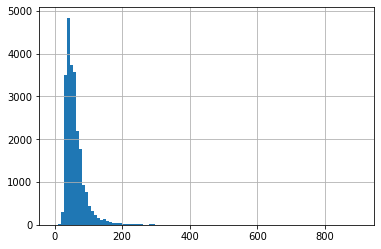

In [25]:
df['total_area'].hist(range = (0,900), bins=100)
df['total_area'].describe()

Comment: The graph has its peak around 37 square metters, most of the houses' total area range from 30 to 100 square meters. Houses with total area more than 200 square meters are already rare. Almost no houses have more than 300-square-meter total_area, here the histogram merges with zero (if there are visits, they’re few and far between).
Decide to drop values that are larger than 300 square meters. 

In [26]:
#Count number of houses that are > 300 square meters in total area
len(df.query('total_area > 300')) #61
#Drop these observations
df = df.query('total_area <= 300')

df['total_area'].describe()

#Investigate the big houses (total_area > 100): too see if the price_level is compatible with the area
len(df.query('total_area > 100')) #1758

df.query('total_area > 100 & last_price_level == (0,1)') #10 rows, not many, these houses might have some disadvantages in distance_to_center or locality


,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,date_removed,last_price_level,total_area_level,price_per_sm,ad_weekday,ad_month,ad_year,floor_topbot,living_ratio,kitchen_ratio
4659,2019-02-28,NaN,33000.0,5,11.0,71.0,115.0,0.0,3.001081,5.0,1,1,True,False,False,slantsy,26073.0,17986.0,3127.0,0.0,586.871424,1.0,NaT,0,4,286.956522,3,2,2019,first,0.617391,0.095652
7085,2019-03-03,19.0,73000.0,5,9.0,55.0,110.0,0.0,2.500000,6.0,5,16,True,False,False,kirishi,26711.0,14816.0,3127.0,0.0,586.871424,1.0,2019-03-22,1,4,663.636364,6,3,2019,other,0.500000,0.081818
8793,2019-03-20,8.0,244.0,2,40.5,32.0,109.0,0.0,2.750000,25.0,25,7,True,False,False,saint petersburg,36421.0,9176.0,805.0,1.0,NaN,0.0,2019-03-28,0,4,2.238532,2,3,2019,last,0.293578,0.371560
14655,2018-09-11,209.0,79000.0,3,18.7,80.0,119.3,0.0,2.800000,3.0,3,14,True,False,False,village kikerino,26711.0,14816.0,3127.0,0.0,586.871424,1.0,2019-04-08,1,4,662.196144,1,9,2018,last,0.670578,0.156748
17753,2016-02-18,139.0,36000.0,5,12.9,23.6,117.3,0.0,3.001081,4.0,2,12,False,False,False,saint petersburg,24670.0,5238.0,3127.0,0.0,NaN,0.0,2016-07-06,0,4,306.905371,3,2,2016,other,0.201194,0.109974
18186,2016-05-29,812.0,57000.0,5,9.0,76.0,106.0,0.0,2.600000,5.0,2,8,True,False,False,siversky village,26073.0,17986.0,3127.0,0.0,586.871424,1.0,2018-08-19,0,4,537.735849,6,5,2016,other,0.716981,0.084906
19952,2016-06-24,203.0,44000.0,4,13.7,90.7,138.7,0.0,3.001081,7.0,5,7,False,False,False,saint petersburg,25221.0,4069.0,3127.0,0.0,653.000000,2.0,2017-01-13,0,4,317.231435,4,6,2016,other,0.653929,0.098774
21338,2016-06-16,11.0,64000.0,1,13.0,43.0,190.0,0.0,3.000000,6.0,4,15,False,False,False,saint petersburg,22592.0,4312.0,350.0,1.0,NaN,0.0,2016-06-27,1,4,336.842105,3,6,2016,other,0.226316,0.068421
22963,2018-06-26,57.0,63000.0,5,24.0,78.0,102.0,1.0,3.001081,9.0,8,16,True,False,False,kingisepp,26073.0,17986.0,3127.0,0.0,586.871424,1.0,2018-08-22,0,4,617.647059,1,6,2018,other,0.764706,0.235294
23458,2016-11-04,NaN,51000.0,5,9.0,66.0,103.1,0.0,2.500000,5.0,4,16,True,False,False,village vozrozhdeniye,26073.0,17986.0,3127.0,0.0,586.871424,1.0,NaT,0,4,494.665373,4,11,2016,other,0.640155,0.087294


### 4.1.2. Price

count    2.350400e+04
mean     1.260672e+05
std      1.556522e+05
min      2.440000e+02
25%      6.800000e+04
50%      9.200000e+04
75%      1.350000e+05
max      6.600000e+06
Name: last_price, dtype: float64

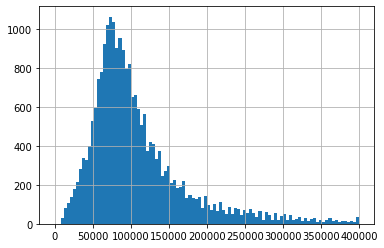

In [27]:
df['last_price'].hist(range=(0,400000), bins=100)
df['last_price'].describe()

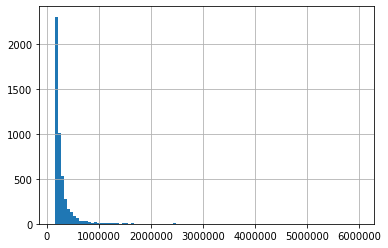

In [28]:
df['last_price'].hist(range=(150000,6000000), bins=100)

Comment: The graph has its peak around 70k-80k dollars, most of the houses' total area range from 68k to 135k dollars (the interquartile range). The maximum price (6.6mil), the minimum price is 244 dollars. 
- However this minumum value is suspected to be incorrectly inputed. The graph shows there is a space between values above 8100 and near 0. Need to investigate
- On the higher end of the value range, houses that cost more than 1.8million are very rare --> drop

In [29]:
df = df.query('last_price > 8100 & last_price < 1800000') 
df['last_price'].describe()

count    2.347700e+04
mean     1.229695e+05
std      1.187100e+05
min      8.600000e+03
25%      6.800000e+04
50%      9.200000e+04
75%      1.340000e+05
max      1.740000e+06
Name: last_price, dtype: float64

### 4.1.3. Number of rooms

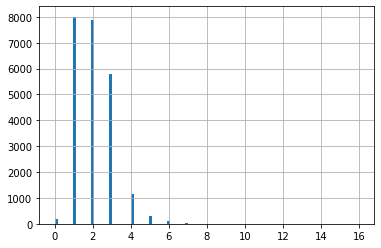

In [30]:
df['bedrooms'].hist(bins=100)

len(df.query('bedrooms > 8 & last_price_level != 4')) #11

df['bedrooms'].value_counts()

#Houses that have more than 8 rooms are rare, let choose this as a threshold 
#Drop houses that have more than 8 rooms

df = df.query('bedrooms <= 8')

### 4.1.4. Ceiling height

count    23466.000000
mean         2.763745
std          0.992411
min          1.000000
25%          2.600000
50%          2.703423
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

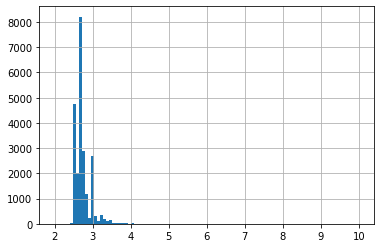

In [31]:
df['ceiling_height'].hist(range=(2,10), bins=100)
df['ceiling_height'].describe()

In [32]:
#Decide to drop rows that have ceiling_height > 5 (because values are rare and impractical height for ceilings)
len(df.query('ceiling_height > 5')) #only 33 observations
df = df[df.ceiling_height <= 5]
df['ceiling_height'].describe()

count    23433.000000
mean         2.735481
std          0.221381
min          1.000000
25%          2.600000
50%          2.703423
75%          2.750000
max          5.000000
Name: ceiling_height, dtype: float64

##### Comment: 
The graph's peak is around 2.7 meter - this is a practical ceiling height. Decide to drop rows that have ceiling height > 5 (there are only 33 observations with ceiling height >5, so safe to drop)

### 4.2. Task 2&3: 
- Examine the time it's taken to sell the apartment and plot a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered to have happened rather quickly or taken an extra long time?

- Remove rare and outlying values and describe the patterns you've discovered.

### 4.2.1. Investigate the general info of days_listed for a sale to be completed

count    20289.000000
mean       180.318991
std        219.339807
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_listed, dtype: float64

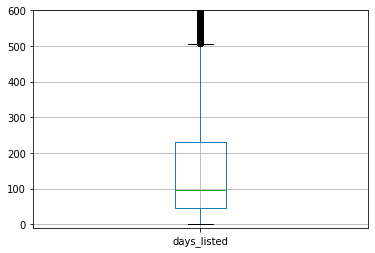

In [33]:
#Using boxplot to investigate the values of days_listed
df.boxplot(column=['days_listed'])
plt.ylim(-10, 600)
df['days_listed'].describe()

### Comments:
- The mean (180) is nearly double the median (95), which means there are a few high values that affect the mean
- Regular values fall within the whiskers, which range from 1 to 510 days. 
- The interquartile ranges from 45 to 230 days - this is the range where most the values lie within. 
- The outliers are displayed as points outside of the whiskers: > 510 (the other end of the whisker stops at 0). Therefore a sale can be considered to have happened too long are those that take more than around 510 days. Actually those sale that were sold below the Q1 (45 days) seem suspiciously quick too. 

### 4.2.2. Investigate the suspiciously long time to sell a house

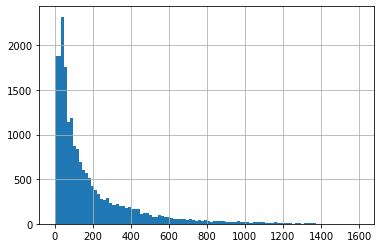

In [34]:
#Using histogram to investigate the values of days_listed
df['days_listed'].hist(range=(0,1600), bins=100)

There's a sharp peak around 45 and 60 days, whereas the wider peak is around 230 days. This confirms the conslusion from the boxplot: 45-230 days is the average time it usually takes to complete a sale. The distribution has a long tail, which means there are a few high values that affect the mean. There aren't many values after 1000 days, although we have a few outliers ranging all the way up to 1580 days. 

In [35]:
len(df.query('days_listed > 1000')) #271 observations - ~1% of the dataset, safe to drop

271

The time that takes more than 1000 days (nearly 3 years) seem to be suspicious. Also, the typical US home spent between 65 and 93 days on the market, from listing to closing (ref: https://www.zillow.com/sellers-guide/average-time-to-sell-a-house/).
People might forget to take out the ad even after the property was sold, or it might be a scam. If that's the case, they don't count toward our research. Decide to drop observations > 1000 days

In [36]:
df = df.query('days_listed <= 1000')
df['days_listed'].describe()

count    20018.000000
mean       166.935508
std        187.372279
min          1.000000
25%         44.000000
50%         93.000000
75%        220.000000
max       1000.000000
Name: days_listed, dtype: float64

### 4.2.3. Investigate the suspiciously quick time to sell a house

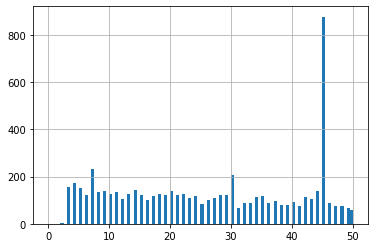

In [37]:
df['days_listed'].hist(range=(0,50), bins=100)

The houses that were sold below 3 days are very rare --> drop these houses

In [38]:
df = df.query('days_listed >=3')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20014 entries, 1 to 23697
Data columns (total 32 columns):
date_posted          20014 non-null datetime64[ns]
days_listed          20014 non-null float64
last_price           20014 non-null float64
bedrooms             20014 non-null int64
kitchen_area         20014 non-null float64
living_area          20014 non-null float64
total_area           20014 non-null float64
balconies            20014 non-null float64
ceiling_height       20014 non-null float64
floors_total         20014 non-null float64
floor                20014 non-null int64
total_images         20014 non-null int64
bike_parking         20014 non-null bool
is_studio            20014 non-null bool
is_open_plan         20014 non-null bool
locality_name        20014 non-null object
airport_dist         20014 non-null float64
city_center_dist     20014 non-null float64
park_dist            20014 non-null float64
parks_within_3000    20014 non-null float64
pond_dist           

### Task 2 & 3 conclusions:
- The mean is nearly double the median (95), which means there are a few high values that affect the mean
- A sale can be considered to have happened too quickly are those took less than 3 days to complete.
- A sale can be considered to have happened too long are those took more than 1000 days to complete. 
- These are the two safe thresolds (3 and 1000 days) to remove data points, actually it mostly took 45 to 230 days to complete a sale 

### 4.3. Task 4: Examine Which factors have had the biggest influence on an apartment’s price

Describe: 
- Examine whether the apartment's price depends on:
    - Continuous variables: total square area, the proximity to the city center area
    - Discrete variable: number of rooms
    - Categorical variable: floor (top or bottom)
- Also check whether the publication date has any effect on the price: 
   - Day of the week
   - Month
   - Year

*Note that using scatter plot is preferable to hexbin. If you do decide to use hexbin, please use scatter plot too, and then compare the results. It is also recommended to check the hexbin documentation and carefully study its parameters.

### 4.3.1. Relationship between apartment price and continuous variables: total square area, the proximity to the city center area

### 4.3.1.1. Total square area

(0, 2000000)

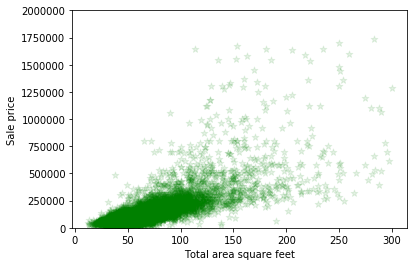

In [39]:
#scatterplot

plt.scatter(df['total_area'], df['last_price'], label= 'Sale Price vs total area square feet', color= "green",  
            marker= "*", s=50, alpha=0.1) 
plt.xlabel('Total area square feet') 
plt.ylabel('Sale price') 
plt.ylim(0,2000000)

#### Comments about the graph:
- Most of the houses have a total area from 12 to 140 square meters with the corresponding price range from 10,000 - 300,000 dollars. The houses in these ranges follow an approximate linear relationship, i.e. the bigger the total area is, the higher the sale price is.
- The houses out of these ranges do not follow any pattern (the points in the plot form a cloud without any specific pattern)

In [40]:
#Investigate the correlation by corr test
df['total_area'].corr(df['last_price'])

0.7496652961833968

The correlation coefficient is strong, confirms the above comments from the plot.

(0, 500000)

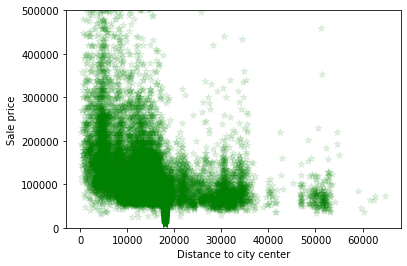

In [41]:
plt.scatter(df['city_center_dist'], df['last_price'], label= 'Sale Price vs total area square feet', color= "green",  
            marker= "*", s=50, alpha=0.1) 
plt.xlabel('Distance to city center') 
plt.ylabel('Sale price') 
plt.ylim(0,500000)

#### Comments about the graph:
- Most of the houses that are at higher price (>300,000) are closer to city center, i.e. distance is shorter (< 10000m or 10km) --> a negative correlation
- There is a smaller portion of houses that are very far from city center (>40km). Most of theses houses have lower price (<100,000 dollars) --> a negative correlation
- The housess' distance to the city in the range of 0-20000m have sale price varying in the range of 50,000 to 200,000 dollars. In this range, distance and sale price do not follow a clear pattern. 

In [42]:
#Investigate the correlation by corr test
df['city_center_dist'].corr(df['last_price'])

-0.33175651955326974

This is a relatively weak negative correlation coefficient, which confirms the results from the graph.

### 4.3.1.2. Relationship between apartment price and discrete variable: number of rooms

(0, 2000000)

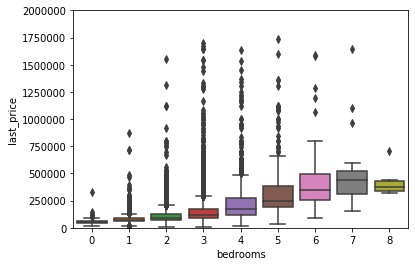

In [43]:
#Use box-plot instead of scatterplot
sns.boxplot(x="bedrooms", y="last_price", data=df)
plt.ylim(0, 2000000)

#### Comments about the graph:
- Houses with 0-3 bedrooms have a narrow avarage price range, from 60k - 120k
- Houses with more than 3 bedrooms have wider price range
- The number of bedrooms follows a positive correlation with the median price

In [44]:
#Investigate the correlation by corr test
df['bedrooms'].corr(df['last_price'], method='spearman') #because of discrete data, use spearman method

0.533980175584699

The correlation is moderately strong, which confirms the findings from the graph

### 4.3.1.3. Relationship between apartment price and categorical variable: floor

(0, 250000)

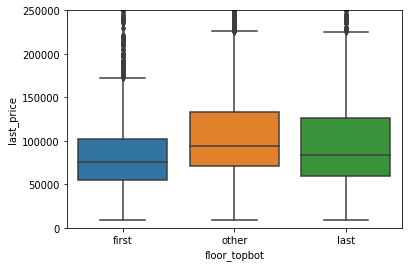

In [45]:
sns.boxplot(x="floor_topbot", y="last_price", data=df)
plt.ylim(0, 250000)

#### Comments about the graph:
The relationship between apartment price and the floor that the apartment is on (first or top) is not clear though the median price of the houses on the top floor is slightly higher than that of the houses at the first floor.

### 4.3.1.4. Relationship between apartment price and publication date: day of the week, month, year

### a. Relationship between apartment price and the day of the week that an ad was published

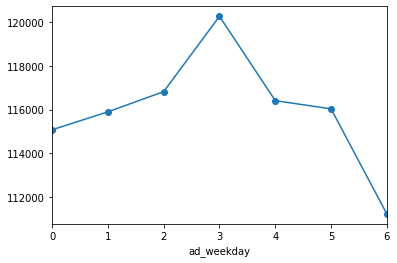

In [46]:
#Create graphs to examine the pattern between ad day of the week and housing price
df.groupby('ad_weekday')['last_price'].mean().plot(style="o-")

#### Comments about the graph:
- The price goes up in the first half of the week, reaching its highest price on Thursday
- Then it goes down in the second half of the week, reaching its lowest price on Sunday

### b. Relationship between apartment price and the month that an ad was published

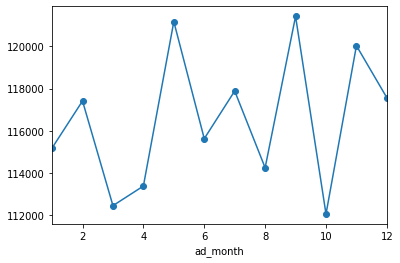

In [47]:
#Create graphs to examine the pattern between ad month and housing price
df.groupby('ad_month')['last_price'].mean().plot(style="o-")

#### Comments about the graph:
- The mean housing price is highest in May and September
- The mean housing price is lowest in March and October
- There is not a linear relationship between month of the ad and housing price, instead the lines form a zig zag shape: the price goes up in one month, then the next month it drops (except from March to May)

### c. Relationship between apartment price and the year that an ad was published

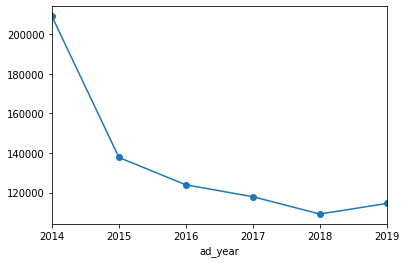

In [48]:
#Create graphs to examine the pattern between ad year and housing price
df.groupby('ad_year')['last_price'].mean().plot(style="o-")

#### Comments about the graph:
- The house price in the year 2014 has the highest median 
- From 2014 to 2015, the price dropped dramatically
- From 2015 to 2018, the price went down year by year with a slower rate
- 2019: the price went up a little bit

### Task 4 conclusions:
- The factors that have the biggest influence on the apartment price are: total area, followed by number of bedrooms and lastly distance to city center.
- The time that an ad was published (day of the week, month, year) affects the house price but not in a linear relationship

### Task 5: Examine the localities that have the highest and lowest housing price

Describe: 
- Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities
- Determine which ones have the highest and lowest housing prices.

*Note: You can find this data by name in the ’locality_name’ column.

In [49]:
#Select the 10 localities with the largest number of ads
df['locality_name'].value_counts().head(10)

saint petersburg     13281
murino village         540
shushary village       403
vsevolozhsk            335
kolpino                305
pargolovo village      301
pushkin                298
kudrovo village        294
gatchina               267
vyborg                 207
Name: locality_name, dtype: int64

In [50]:
#Get the top 10 localities with the highest number of ads and save them into a list to extract data
top_localities = df['locality_name'].value_counts()[:10].index.tolist()
top_localities

['saint petersburg',
 'murino village',
 'shushary village',
 'vsevolozhsk',
 'kolpino',
 'pargolovo village',
 'pushkin',
 'kudrovo village',
 'gatchina',
 'vyborg']

In [51]:
#Extract a dataframe from the original df that has the locality_name in the top_localities list
top = df.query('locality_name in @ top_localities')
top.head(50)
top['locality_name'].unique()

array(['shushary village', 'saint petersburg', 'pargolovo village',
       'murino village', 'pushkin', 'kudrovo village', 'kolpino',
       'gatchina', 'vyborg', 'vsevolozhsk'], dtype=object)

In [52]:
#calculate the average price per square meter in these localities
price_persm = top.groupby('locality_name')[['price_per_sm','last_price']].agg('mean').reset_index()
price_persm.columns = ['locality_name', 'price_per_sm', 'total_price']
price_persm = price_persm.sort_values(by='total_price', ascending = False)
price_persm                                  

,locality_name,price_per_sm,total_price
6,saint petersburg,2216.033742,140469.232964
5,pushkin,2043.479838,118782.577181
4,pargolovo village,1788.479872,87868.667774
2,kudrovo village,1848.430500,84675.193878
7,shushary village,1555.960306,81092.694789
1,kolpino,1494.014869,75874.439344
8,vsevolozhsk,1372.462841,73822.235821
3,murino village,1715.500028,72948.448148
0,gatchina,1358.769593,67359.554307
9,vyborg,1141.118798,60861.159420


### Task 5 conclusions:
- The top 10 localities that have the highest number of ads are: 'saint petersburg', 'pushkin', 'pargolovo village', 'kudrovo village', shushary village', 'kolpino', 'vsevolozhsk', 'murino village',  , gatchina', 'vyborg'.
- Sain Petersburg has the highest while Vyborg village has the lowest housing price.

### Task 6: Pinpoint which area is considered to be in the city center

Describe: 
- Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. 
- Select apartments in Saint Petersburg (‘locality_name’). 
- Create a column with the distance to the city center in km and round to the nearest whole number.
- Next, calculate the average price for each kilometer 
- Plot a graph to display how prices are affected by the distance to the city center. 
- Find a place on the graph where it shifts significantly. That's the city center border.

In [53]:
#Select apartments in Saint Petersburg (‘locality_name’)
sp = df.query('locality_name == "saint petersburg"')
sp['locality_name'].unique() #checked!

array(['saint petersburg'], dtype=object)

In [54]:
#Create a column with the distance to the city center in km and round to the nearest whole number
sp['center_dist_km'] = (sp['city_center_dist']/1000).round(decimals=0)
sp.head(10)
sp['center_dist_km'].unique()

array([14.,  7.,  8., 15., 11., 13., 10.,  2., 12.,  4., 16., 17.,  5.,
        9.,  3.,  6., 21.,  1., 24., 26., 22., 18., 20., 23., 25., 27.,
       28., 19.,  0., 29.])

In [55]:
#Calculate the average price for each kilometer
price_dist = sp.groupby('center_dist_km')['last_price'].agg('median').reset_index()
price_dist.columns = ['km', 'median_house_price']
price_dist = price_dist.sort_values(by='median_house_price', ascending = False)
price_dist

,km,median_house_price
0,0.0,219800.0
1,1.0,203000.0
2,2.0,188000.0
5,5.0,175400.0
4,4.0,172000.0
27,27.0,166000.0
6,6.0,164000.0
3,3.0,158000.0
7,7.0,144000.0
8,8.0,138438.0


(0, 500000)

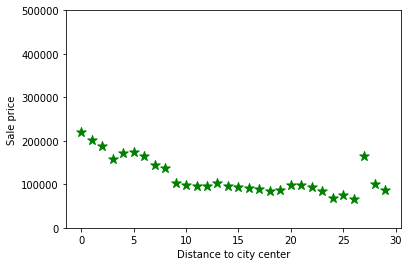

In [56]:
#Graph
plt.scatter(price_dist['km'], price_dist['median_house_price'], label= 'Sale Price vs distance to city center', color= "green",  
            marker= "*", s=100) 
plt.xlabel('Distance to city center') 
plt.ylabel('Sale price') 
plt.ylim(0,500000)

### Task 6 conclusions:
The city center area is the area that is ~8km from the center to each house.

### Task 7: Examine correlations among factors and between house price and other factors in the city center and compare with the whole country

Describe: 
- Select all the apartments in the city center and examine correlations between the following parameters: 
   - total area
   - price
   - number of rooms
   - ceiling height
- Also identify the factors that affect an apartment’s price: 
   - number of rooms 
   - floor
   - distance to the city center
   - ad publication date. 
- Draw your conclusions. Are they different from the overall deductions about the entire city?

In [57]:
#Select all the apartments in the city center
center = df.query('city_center_dist <= 8000')
center['city_center_dist'].describe()

count    2994.000000
mean     4777.576152
std      1789.279426
min       208.000000
25%      3677.000000
50%      4836.000000
75%      6017.000000
max      7998.000000
Name: city_center_dist, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994 entries, 3 to 23691
Data columns (total 4 columns):
last_price        2994 non-null float64
total_area        2994 non-null float64
bedrooms          2994 non-null int64
ceiling_height    2994 non-null float64
dtypes: float64(3), int64(1)
memory usage: 117.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe5e510150>,
      dtype=object)

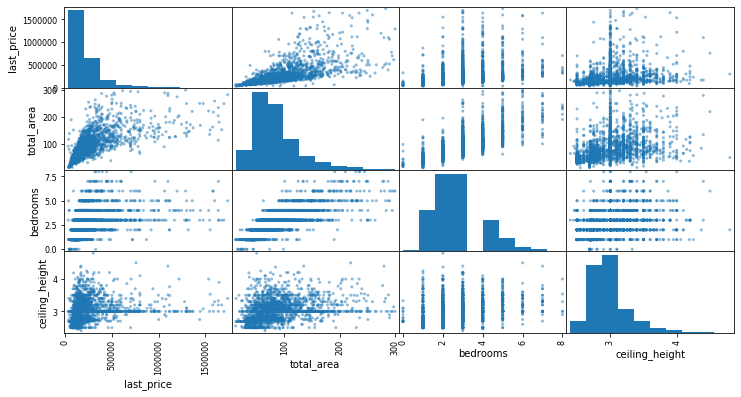

In [58]:
#examine correlations between the following parameters: total area, price, number of rooms, ceiling height
#Select the above columns from the orginal df
center1 = center[['last_price','total_area','bedrooms','ceiling_height']]
center1.info() #2994 observations, 4 columns

#Graph
pd.plotting.scatter_matrix(center1, figsize=(12,6))

In [59]:
#Using corr test
center1.corr(method='spearman') #because there are non-normal distribution, use spearman method instead of pearson

,last_price,total_area,bedrooms,ceiling_height
last_price,1.000000,0.818114,0.565948,0.458395
total_area,0.818114,1.000000,0.824628,0.534468
bedrooms,0.565948,0.824628,1.000000,0.445563
ceiling_height,0.458395,0.534468,0.445563,1.000000


#### Comments about the correlation matrix graph:
- The strong correlations exist between these pairs:
    - total_area and bedrooms
    - total_area and last_price
- The moderate correlations exist between these pairs:
    - bedrooms and last_price
    - total_area and ceiling_height
- The relatively weak correlations exist between these pairs:
    - ceiling_height and last_price 
    - ceiling_height and bedrooms

#### Identify the factors that affect an apartment’s price:
- number of rooms
- floor
- distance to the city center
- ad publication date

In [60]:
#examine correlations between the following parameters: total area, price, number of rooms, ceiling height
#Select the above columns from the orginal df
center2 = center[['last_price','total_area','bedrooms','ceiling_height','floor', 'floor_topbot','city_center_dist','ad_weekday', 'ad_month','ad_year']]
center2.info() #2994 observations, 9 columns

#Graph
center2.corr(method='spearman') #because there are non-normal distribution, use spearman method instead of pearson

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994 entries, 3 to 23691
Data columns (total 10 columns):
last_price          2994 non-null float64
total_area          2994 non-null float64
bedrooms            2994 non-null int64
ceiling_height      2994 non-null float64
floor               2994 non-null int64
floor_topbot        2994 non-null object
city_center_dist    2994 non-null float64
ad_weekday          2994 non-null int64
ad_month            2994 non-null int64
ad_year             2994 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 257.3+ KB


,last_price,total_area,bedrooms,ceiling_height,floor,city_center_dist,ad_weekday,ad_month,ad_year
last_price,1.000000,0.818114,0.565948,0.458395,0.175735,-0.113229,0.005883,-0.027972,-0.065370
total_area,0.818114,1.000000,0.824628,0.534468,0.063100,-0.161517,-0.006764,-0.013246,-0.116829
bedrooms,0.565948,0.824628,1.000000,0.445563,-0.039370,-0.187794,-0.015372,-0.007817,-0.085784
ceiling_height,0.458395,0.534468,0.445563,1.000000,-0.111988,-0.283607,-0.028349,-0.022204,-0.056053
floor,0.175735,0.063100,-0.039370,-0.111988,1.000000,0.247322,0.045683,0.018139,-0.015533
city_center_dist,-0.113229,-0.161517,-0.187794,-0.283607,0.247322,1.000000,0.025117,-0.005294,0.028268
ad_weekday,0.005883,-0.006764,-0.015372,-0.028349,0.045683,0.025117,1.000000,0.025920,0.006849
ad_month,-0.027972,-0.013246,-0.007817,-0.022204,0.018139,-0.005294,0.025920,1.000000,-0.162923
ad_year,-0.065370,-0.116829,-0.085784,-0.056053,-0.015533,0.028268,0.006849,-0.162923,1.000000


Comments from the matrix of correlation coefficient for those continuous variables:
- Strong correlations with housing price:
    - total area
- Moderate correlations with housing price:
    - bedrooms
    - ceiling_height

(0, 1000000)

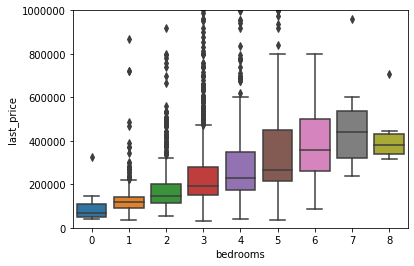

In [61]:
#Investigate correlation between housing price and discrete and categorical variables
#bedrooms
sns.boxplot(x="bedrooms", y="last_price", data=center2)
plt.ylim(0, 1000000)

#### Comments about the graph: similar to the whole country
- Houses with 0-3 bedrooms have a narrow avarage price range, from 60k - 120k
- Houses with more than 3 bedrooms have wider price range
- The number of bedrooms follows a moderately positive correlation with the median price

(0, 400000)

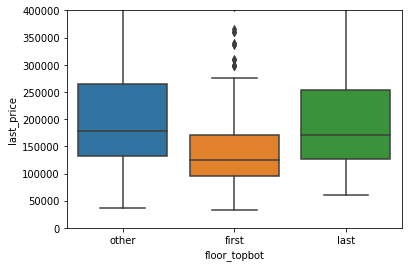

In [62]:
#Investigate correlation between housing price and discrete and categorical variables
#bedrooms
center2.head()
sns.boxplot(x="floor_topbot", y="last_price", data=center2)
plt.ylim(0, 400000)

The relationship between apartment price and the floor that the apartment is on (first or top) is clearer than the whole city where the median price of the houses on the top floor is relatively higher than that of the houses at the first floor.

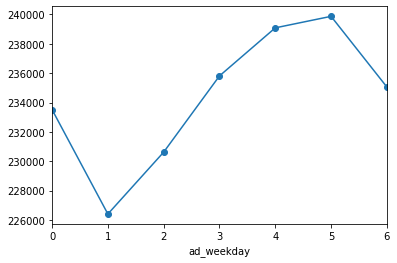

In [63]:
#Create graph to examine the pattern between ad day of the week and housing price
center2.groupby('ad_weekday')['last_price'].mean().plot(style="o-")
plt.show()

#### Comments about the graph: different from the whole country
- The price goes down significantly from Monday to Tuesday (the lowest price)
- The price goes up until Saturday (the highest price)
- Then it goes down from Saturday to Sunday

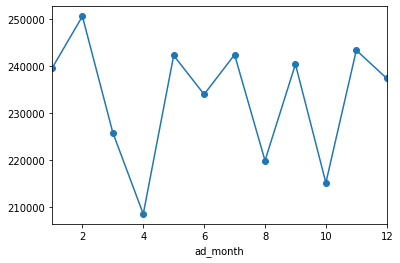

In [64]:
#Create graph to examine the pattern between ad month and housing price
center2.groupby('ad_month')['last_price'].mean().plot(style="o-")
plt.show()

#### Comments about the graph: different from the whole country
- The mean housing price is highest in February
- The mean housing price is lowest in April
- There is not a linear relationship between month of the ad and housing price, instead the lines form a zig zag shape: the price goes up in one month, then the next month it drops (except from February to April)

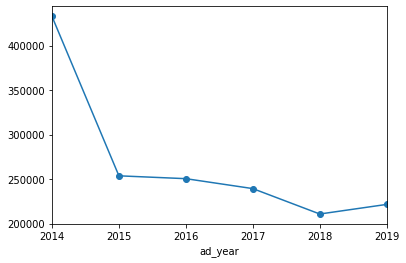

In [65]:
#Create graph to examine the pattern between ad month and housing price
center2.groupby('ad_year')['last_price'].mean().plot(style="o-")
plt.show()

#### Comments about the graph: similar to the whole country
- The house price in the year 2014 has the highest median 
- From 2014 to 2015, the price dropped dramatically
- From 2015 to 2018, the price went down year by year with a slower rate
- 2019: the price went up a little bit

### Task 7 conclusions:
There are both similarities and differences in the correlation between housing price and certain factors between the whole country and the city center

#### Similarities:
- The factor that have the biggest influence on the apartment price is: total area
- Number of bedrooms also shows moderately positive correlation with housing price
- The time that an ad was published (day of the week, month, year) affects the house price but not in a linear relationship
- The same correlation between year and housing price

#### Differences:
- The correlation between distance to city centers and housing price became weaker in the city center (because the distance does not varied much in the city center compared to the whole country).
- The relationship between apartment price and the floor that the apartment is on (first or top) is stronger than the whole city where the median price of the houses on the top floor is relatively higher than that of the houses at the first floor.
- Differences in day of the week and month in terms of the highest price and lowest price.

### Step 5. Overall conclusion

This project explores the housing price in Russia and its influencing factors. Total area of the house is the strongest factor that affects the housing price. Other factors include number of bedrooms, distance to the city center and the time that an ad was published (day of the week, month, year).

Houses in the city center share some influencing factors with the whole countries but they also have their unique characteristics and nature of relationship between housing price and the influencing factors. 

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn